# Assignment 03

# 12032885-朱慧妍

## Notice：如果遇到代码报错，请重新启动Jupyter，并从头开始运行代码。Thanks

## 1. Niño 3.4 index

### 1.1

#### import所需模块，读取.cn文件，并命名为ds1

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
ds1 = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds1

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

#### 按月份对数据进行groupby后用减法获得异常值

In [2]:
groupby_data = ds1.sst.groupby('time.month')
sst_anomalies = groupby_data - groupby_data.mean(dim='time')
sst_anomalies

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-4.99606133e-04, -4.80890274e-04, -2.60949135e-04, ...,
         -6.23464584e-05, -1.96099281e-04, -2.56419182e-04],
        [ 8.34465027e-07,  8.34465027e-07, -3.20672989e-05, ...,
          8.34465027e-07, -1.93119049e-05, -1.23977661e-05],
        [ 8.34465027e-07,  8.34465027e-07,  8.34465027e-07, ...,
          8.34465027e-07,  8.34465027e-07,  8.34465027e-07]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          7.20262527e-04,  1.48342848e-02,  3.37822437e-02],
        [ 8.60170126e-02,  1.03921890e-01,  1.17389798e-01, ...,
          3.52077484e-02,  5.62392473e-02,  7.08031654e-02],
        [ 4.64653969e-02,  5.28458357e-02,  5.65373898e-02, ...,
          3.26167345e-02,  3.87690067e-02,  4.36384678e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 5.52459955e-02,  6.29582405e-02,  6.44934177e-02, ...,
          1.50566101e-02,  3.07782888e-02,  4.51773405e-02],
        [ 4.06903028e-02,  4.51246500e-02,  4.60950136e-02, ...,
          2.47172117e-02,  3.07500362e-02,  3.64114046e-02],
        [ 2.26362944e-02,  2.52594948e-02,  2.62612104e-02, ...,
          1.57128572e-02,  1.88019276e-02,  2.13360786e-02]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

#### 求异常值的三个月的滑动平均，代码参考Lab04中的rolling函数用法

In [3]:
ds1_anom_rolling = sst_anomalies.rolling(time=3, center=True).mean()
ds1_anom_rolling

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          5.24004316e-03,  1.51618719e-02,  2.62249317e-02],
        [ 4.22303677e-02,  4.96788844e-02,  5.51667623e-02, ...,
          1.99752655e-02,  2.89956741e-02,  3.57356891e-02],
        [ 2.30340958e-02,  2.60350313e-02,  2.75989771e-02, ...,
          1.63543224e-02,  1.94383860e-02,  2.16955356e-02]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

#### 选择该区域的位置范围（170W转换为360是190，120W转换为360是240，所以经度范围是（190，240）），并plot出SST在特定位置(5N-5S, 170W-120W)的异常值随整体数据时间的变化。

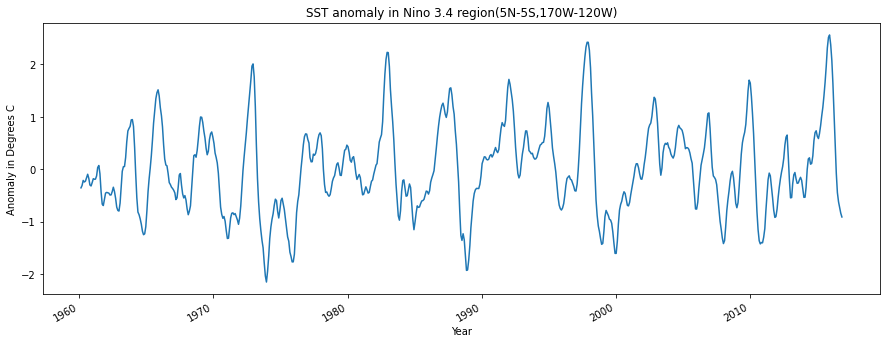

In [4]:
region=ds1_anom_rolling.sel(lon=slice(190, 240), lat=slice(-5, 5))
region.mean(dim=['lat', 'lon']).plot(figsize=(15,5))
plt.title('SST anomaly in Nino 3.4 region(5N-5S,170W-120W)') 
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.show()

### 1.2

#### 第二小问有一个不确定的地方是，因为说要和题目中所给出的图看起来相似，不确定是否时间也应该相同？如果时间相同的话，需要限定时间在（2000，2020），如果是做所有数据的图，则不需要限定时间。以下展示的是限定时间的：

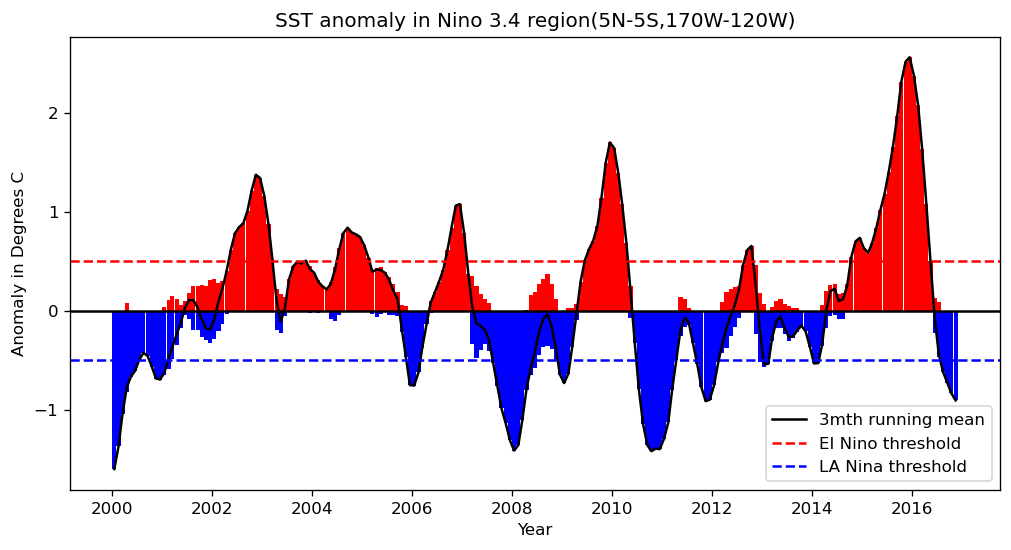

In [5]:
region1=ds1_anom_rolling.sel(lon=slice(190, 240), lat=slice(-5, 5),time=slice('2000','2020'))
region1_mean=region1.mean(dim=['lat','lon'])
sample_up=region1.where(region1>=0).mean(dim=['lat', 'lon'])
sample_down=region1.where(region1<0).mean(dim=['lat', 'lon'])
time=ds1['time'].sel(time=slice('2000','2020'))
plt.figure(figsize=(10,5), dpi=120)
plt.plot(time,region1_mean,color='k',label='3mth running mean')
plt.bar(time,sample_up,width=30.0, bottom=0,color='r')
plt.bar(time,sample_down,width=30.0, bottom=0,color='b')
#添加y为常数值的横线，参考https://blog.csdn.net/SDAU_LY124/article/details/107221937 中的plt.axhline()函数
plt.axhline(0.5,color='r',linestyle='dashed',label='EI Nino threshold')
plt.axhline(-0.5,color='b',linestyle='dashed',label='LA Nina threshold')
plt.axhline(0,color='k',linestyle='solid')
plt.title('SST anomaly in Nino 3.4 region(5N-5S,170W-120W)') 
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend(loc='best')
plt.show()

#### 以下是不限定时间的：

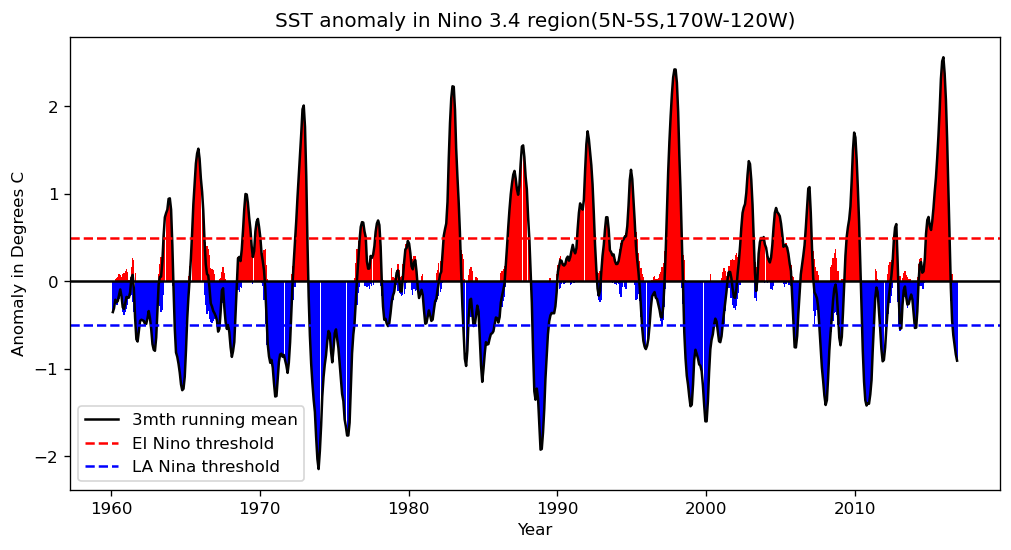

In [6]:
region2=ds1_anom_rolling.sel(lon=slice(190, 240), lat=slice(-5, 5))
region2_mean=region2.mean(dim=['lat','lon'])
sample_up=region2.where(region2>=0).mean(dim=['lat', 'lon'])
sample_down=region2.where(region2<0).mean(dim=['lat', 'lon'])
time=ds1['time']
plt.figure(figsize=(10,5), dpi=120)
plt.plot(time,region2_mean,color='k',label='3mth running mean')
plt.bar(time,sample_up,width=30.0, bottom=0,color='r')
plt.bar(time,sample_down,width=30.0, bottom=0,color='b')
#添加y为常数值的横线，参考https://blog.csdn.net/SDAU_LY124/article/details/107221937 中的plt.axhline()函数
plt.axhline(0.5,color='r',linestyle='dashed',label='EI Nino threshold')
plt.axhline(-0.5,color='b',linestyle='dashed',label='LA Nina threshold')
plt.axhline(0,color='k',linestyle='solid')
plt.title('SST anomaly in Nino 3.4 region(5N-5S,170W-120W)') 
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.legend(loc='best')
plt.show()

## 2. Earth’s energy budget

### 2.1

#### import所需模块，读取.cn文件，并命名为ds2

In [7]:
import numpy as np
import math
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
ds2 = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds2

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

#### 计算TOA区域的长波、短波、太阳辐射和净通量值，并用总量减去前三者得到净通量的计算值

In [8]:
sw=ds2.toa_sw_all_mon.mean(dim='time')
lw=ds2.toa_lw_all_mon.mean(dim='time')
solar=ds2.solar_mon.mean(dim='time')
net=ds2.toa_net_all_mon.mean(dim='time')
total=solar-sw-lw

#### 绘图，比较图片下面两小图可以发现，两者图片十分相似。

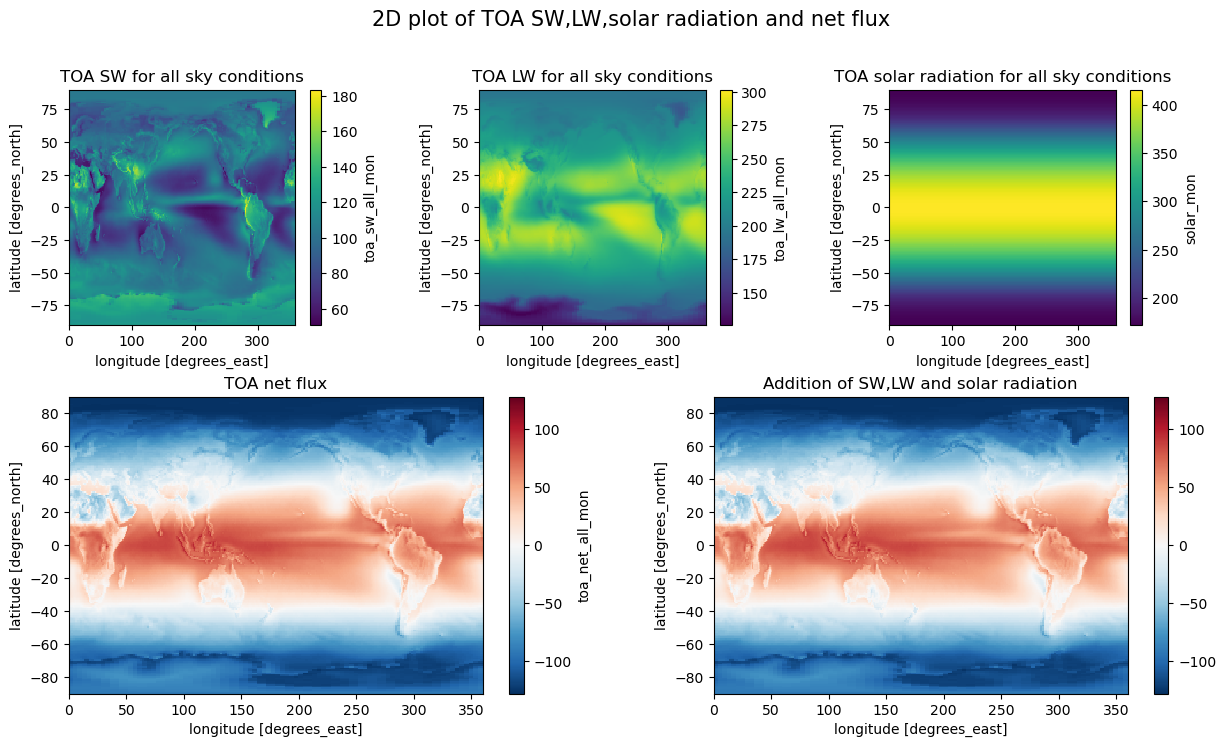

In [9]:
fig = plt.figure(figsize=(15,8), dpi=100)
grid = plt.GridSpec(10, 20) 
plt.subplot(grid[0:4,0:5]) 
sw.plot()  
plt.title('TOA SW for all sky conditions')
plt.subplot(grid[0:4,7:12])  
lw.plot()    
plt.title('TOA LW for all sky conditions')
plt.subplot(grid[0:4,14:19]) 
solar.plot()   
plt.title('TOA solar radiation for all sky conditions')
plt.subplot(grid[5:10,0:9]) 
net.plot()   
plt.title('TOA net flux')
plt.subplot(grid[5:10,11:20]) 
total.plot()   
plt.title('Addition of SW,LW and solar radiation')
plt.suptitle('2D plot of TOA SW,LW,solar radiation and net flux', fontsize=15)  
plt.show()

### 2.2

#### 通过Lab04可知，随着地球纬度的增加，越靠近两极每个网格所占的面积是会变小的，所以引入极坐标来重新定义面积的大小

In [10]:
R=6371 
delta=2*(math.pi)*R*(np.cos(ds2['lat']*(math.pi)/180))/360
area=delta*2*(math.pi)*R/360
Total_surface_area=area.sum()*360
Total_surface_area

<xarray.DataArray 'lat' ()>
array(5.1007086e+08)

#### 计算TOA短波：

In [11]:
sw_cal=sw*area*1e6
outgoing_sw=sw_cal.sum()/Total_surface_area/1e6
outgoing_sw

<xarray.DataArray ()>
array(99.13904888)

#### 计算TOA长波：

In [12]:
lw_cal=lw*area*1e6
outgoing_lw=lw_cal.sum()/Total_surface_area/1e6
outgoing_lw

<xarray.DataArray ()>
array(240.26801593)

#### 计算TOA太阳辐射：

In [13]:
solar_cal=solar*area*1e6
incoming_solar=solar_cal.sum()/Total_surface_area/1e6
incoming_solar

<xarray.DataArray ()>
array(340.28518782)

#### 比较短波+长波的和与太阳辐射值的大小，可以发现两者的值非常地接近

In [14]:
99.13904888+240.26801593

339.40706481

### 2.3

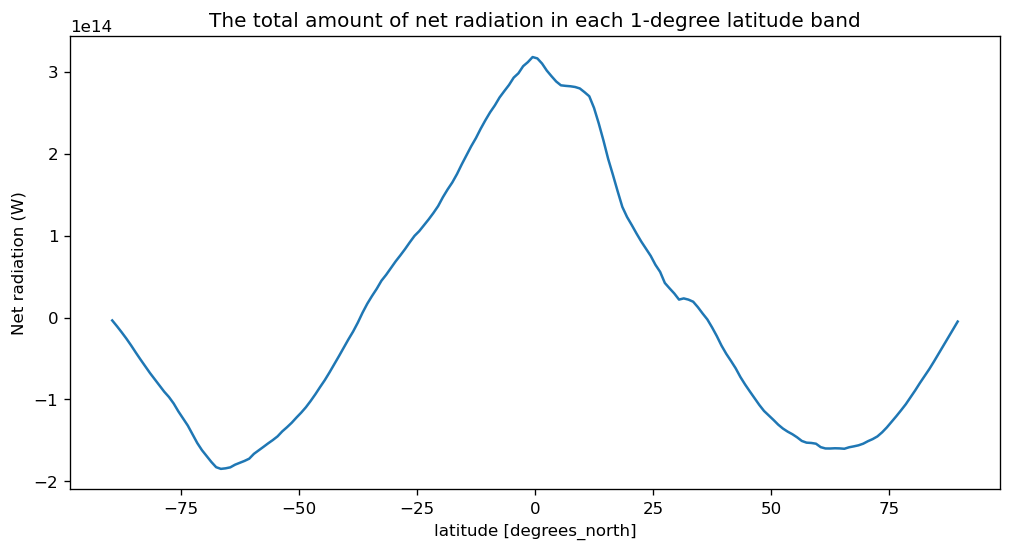

In [15]:
net_ra=total*area*1e6
Total_net_radiation_band=net_ra.sum(['lon'])
Total_net_radiation_band
fig = plt.figure(figsize=(10,5), dpi=120)
Total_net_radiation_band.plot()
plt.title("The total amount of net radiation in each 1-degree latitude band",fontsize=12)
plt.ylabel('Net radiation (W)')
plt.show()

### 2.4

#### 按题目要求选出云面积<=25%和>=75%的区域，并按时间求平均：

In [16]:
sw_low=ds2.toa_sw_all_mon.where(ds2.cldarea_total_daynight_mon<=25).mean(dim=['time'])
sw_high=ds2.toa_sw_all_mon.where(ds2.cldarea_total_daynight_mon>=75).mean(dim=['time'])
lw_low=ds2.toa_lw_all_mon.where(ds2.cldarea_total_daynight_mon<=25).mean(dim=['time'])
lw_high=ds2.toa_lw_all_mon.where(ds2.cldarea_total_daynight_mon>=75).mean(dim=['time'])

#### 图形绘制如下：

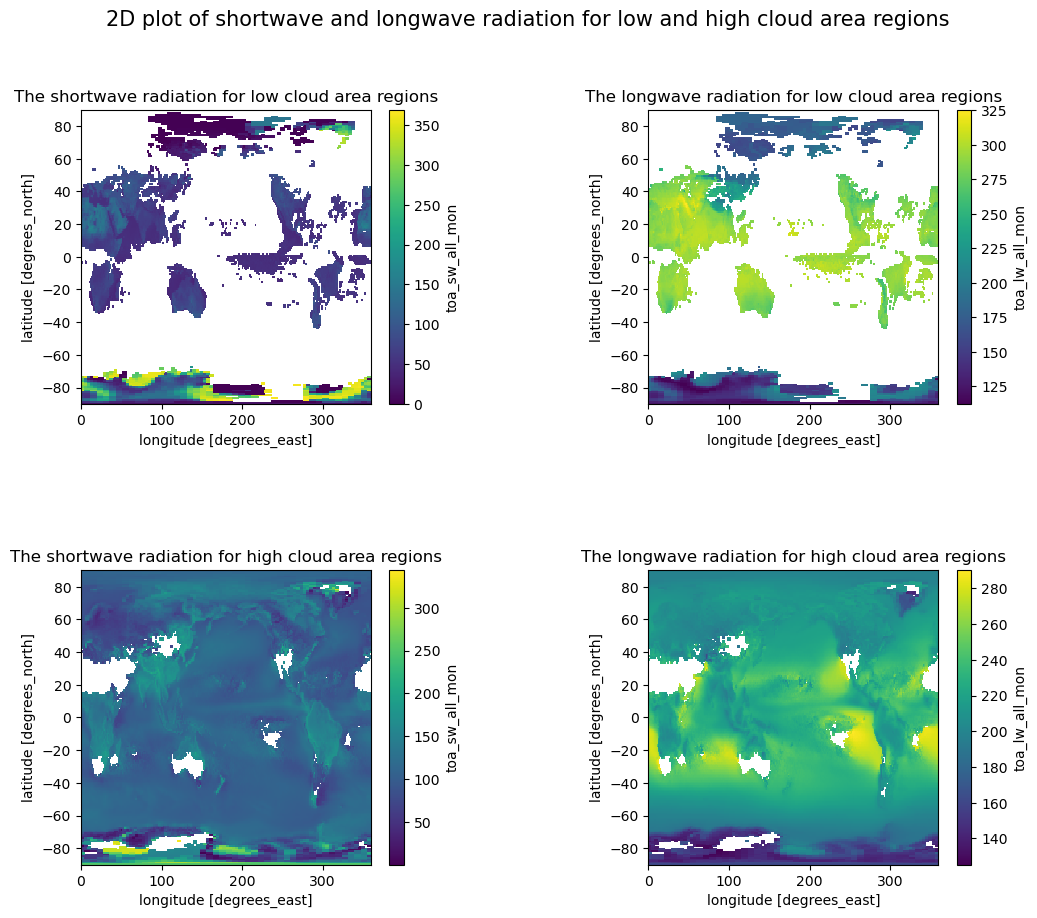

In [17]:
fig = plt.figure(figsize=(12,10), dpi=100)
grid = plt.GridSpec(10, 10) 
plt.subplot(grid[0:4,0:4]) 
sw_low.plot()  
plt.title('The shortwave radiation for low cloud area regions')
plt.subplot(grid[0:4,6:10]) 
lw_low.plot()  
plt.title('The longwave radiation for low cloud area regions')
plt.subplot(grid[6:10,0:4]) 
sw_high.plot()  
plt.title('The shortwave radiation for high cloud area regions')
plt.subplot(grid[6:10,6:10]) 
lw_high.plot()  
plt.title('The longwave radiation for high cloud area regions')
plt.suptitle('2D plot of shortwave and longwave radiation for low and high cloud area regions ', fontsize=15)  
plt.show()

### 2.5

#### 根据结果可以看出，无论在多云还是少云的区域，长波的数据都远大于短波，但是在多云的区域，短波和长波的数据都会多于少云的区域，说明云的存在对短波和长波数据都有影响。

#### 少云短波

In [18]:
sw_low_=sw_low*area*1e6
sw_low_gm=sw_low_.sum()/Total_surface_area/1e6
sw_low_gm

<xarray.DataArray ()>
array(19.65188625)

#### 少云长波

In [19]:
lw_low_=lw_low*area*1e6
lw_low_gm=lw_low_.sum()/Total_surface_area/1e6
lw_low_gm

<xarray.DataArray ()>
array(70.50560434)

#### 多云短波

In [20]:
sw_high_=sw_high*area*1e6
sw_high_gm=sw_high_.sum()/Total_surface_area/1e6
sw_high_gm

<xarray.DataArray ()>
array(104.54761502)

#### 多云长波

In [21]:
lw_high_=lw_high*area*1e6
lw_high_gm=lw_high_.sum()/Total_surface_area/1e6
lw_high_gm

<xarray.DataArray ()>
array(208.53531147)

## 3. Explore a netCDF dataset

### 3.1

#### import 所需模块，读取.cn数据，并命名为ds3

In [22]:
import numpy as np
import math
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
ds3 = xr.open_dataset("RUNOFF_1988.nc", engine="netcdf4")
ds3

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time       (time) datetime64[ns] 1988-01-16T10:30:00 ... 1988-12-16T10:30:00
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    ro         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Nov 10 15:20:32 2020: cdo -s -f nc4 -z zip remap,grid_1...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

#### 选取1988年一整年的径流数据，对其在所有位置按时间求平均，并去除其的季节性变化，绘制径流量在该年随月份的变化曲线，可以看出夏季多雨的时候，径流量远高于其他月份。

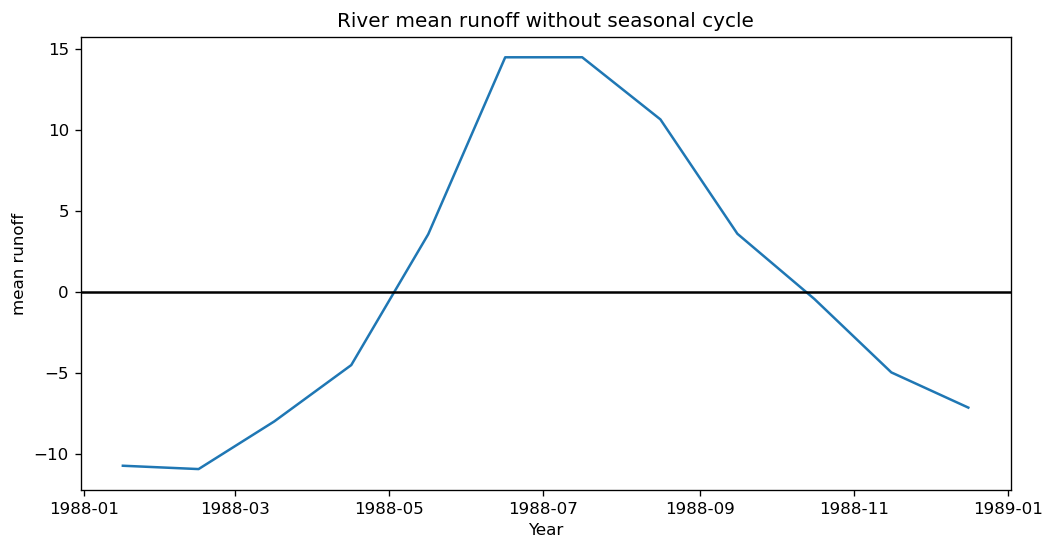

In [24]:
mean=ds3.ro.mean()
time=ds3['time']
mean_remove=ds3.ro.mean(dim=['lat', 'lon'])-mean
fig = plt.figure(figsize=(10,5), dpi=120)
plt.plot(time,mean_remove)
plt.title('River mean runoff without seasonal cycle')
plt.axhline(0,color='k',linestyle='solid')
plt.xlabel('Year')
plt.ylabel('mean runoff')
plt.show()

### 3.2

#### (1)选取1988年的径流数据，不考虑季节性变化的情况下，看径流在1988年月平均值随月份的变化曲线

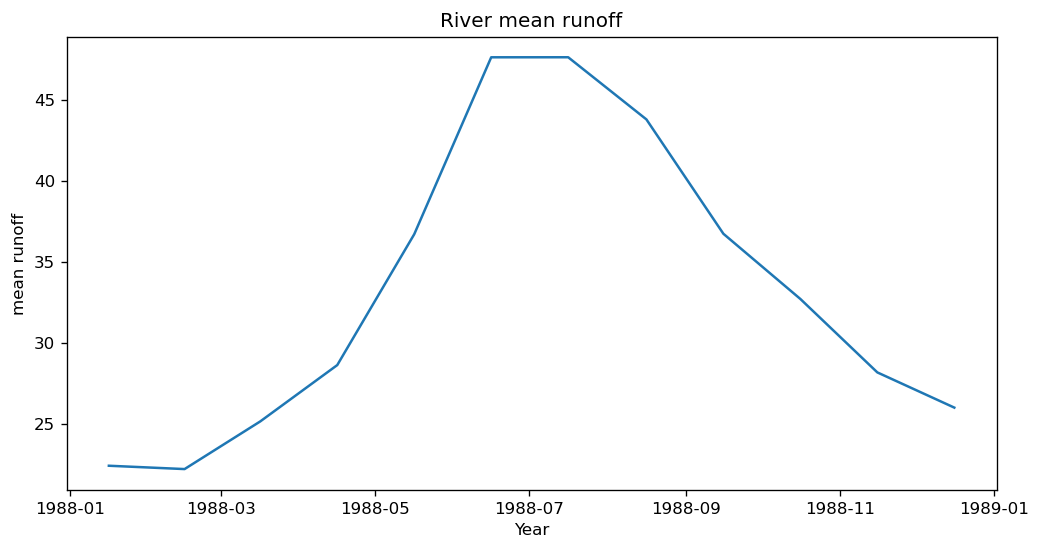

In [25]:
mean=ds3.ro.mean(dim=['lat', 'lon'])
time=ds3['time']
fig = plt.figure(figsize=(10,5), dpi=120)
plt.plot(time,mean)
plt.title('River mean runoff')
plt.xlabel('Year')
plt.ylabel('mean runoff')
plt.show()

#### (2)根据上图，选择平均径流量最小的2月，看其在全球范围内的径流量分布。

<Figure size 720x360 with 0 Axes>

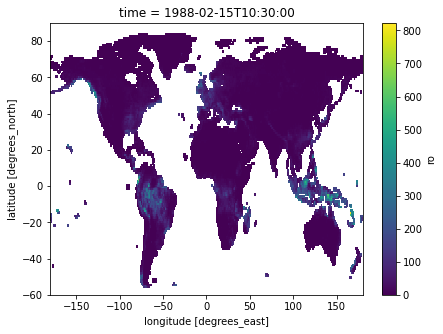

In [26]:
fig=plt.figure(figsize=(10,5))
ds3.ro.sel(time='1988-02').plot(figsize=(7,5))
plt.show()

#### (3)根据上上图，选择平均径流量最大的6月，看其在全球范围内的径流分布。可以看出，相比于上一张图，这张图中有更多的亮色部分，表明有更高的径流值。

<Figure size 720x360 with 0 Axes>

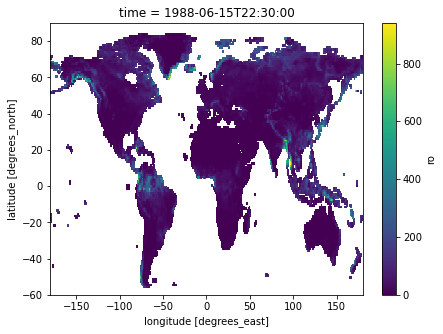

In [27]:
fig=plt.figure(figsize=(10,5))
ds3.ro.sel(time='1988-06').plot(figsize=(7,5))
plt.show()